# Aprendizaje No Supervisado

## Gaussian Mixture Models

Los Modelos de Mezcla Gaussiana (Gaussian Mixture Models o GMM, por sus siglas en inglés) son una técnica de modelado estadístico utilizada en aprendizaje automático y estadísticas para describir la distribución de datos. Esta técnica se utiliza comúnmente en tareas de clasificación, agrupamiento y densidad de probabilidad. Aquí tienes una explicación detallada de lo que es un GMM:

1. **Modelo de Mezcla**: En su núcleo, un GMM es un modelo probabilístico que asume que los datos provienen de una combinación de múltiples distribuciones Gaussianas (también conocidas como distribuciones normales). Cada una de estas distribuciones Gaussianas se llama "componente" del modelo de mezcla.

2. **Distribución Gaussiana**: Una distribución Gaussiana (o normal) es una curva de campana que describe la probabilidad de ocurrencia de los datos alrededor de su media. Esta distribución está completamente definida por dos parámetros: la media (o valor esperado) y la desviación estándar (que controla la dispersión de los datos alrededor de la media).

3. **Componentes del GMM**: Un GMM se compone de varios componentes, cada uno modelando una distribución Gaussiana diferente. Estos componentes se combinan ponderadamente para describir la distribución conjunta de los datos.

4. **Parámetros del GMM**: Para cada componente Gaussiano, se definen tres parámetros principales:
   - Media (μ): Representa el valor esperado o promedio de los datos en ese componente.
   - Desviación estándar (σ): Controla la dispersión de los datos alrededor de la media.
   - Peso (π): Indica la probabilidad de que un punto de datos pertenezca a ese componente específico.

5. **Entrenamiento del GMM**: El proceso de entrenamiento implica ajustar los parámetros del GMM (medias, desviaciones estándar y pesos) de manera que el modelo pueda describir de manera óptima la distribución de los datos observados. Esto se hace típicamente mediante algoritmos de optimización, como el algoritmo de Expectation-Maximization (EM).

6. **Predicciones y Usos**: Una vez que se ha entrenado el GMM, se puede utilizar para diversas tareas, como clasificación, agrupamiento o generación de datos. Por ejemplo, en clasificación, se puede calcular la probabilidad de que un punto de datos pertenezca a cada componente y asignarlo a la clase correspondiente. En agrupamiento, se pueden identificar grupos de datos que sean más similares entre sí en función de las componentes a las que pertenecen.

7. **Flexibilidad**: Los GMMs son flexibles y pueden modelar una amplia variedad de formas de datos, ya que pueden aproximar distribuciones complejas mediante la combinación de distribuciones Gaussianas más simples.

Los Modelos de Mezcla Gaussiana son una técnica poderosa para modelar y comprender la distribución de datos a través de la combinación de múltiples distribuciones Gaussianas. Esto los hace útiles en una variedad de aplicaciones, desde el procesamiento de señales hasta el aprendizaje no supervisado y la generación de datos.

En resumen, ss un modelo probabilistico, donde cada cluster (K) tiene una distribución de probabilidad, cada una de las distribuciones tienen los siguientes parámetros:

Media: la media que define el centro de la distribución, en la imagen inferior es μ

Covarianza: define como de ancha es la distribución, en la imagen es σ

Probabilidades: define como de grande o pequeño es la función gausiana de probabilidad, en la imagen es π

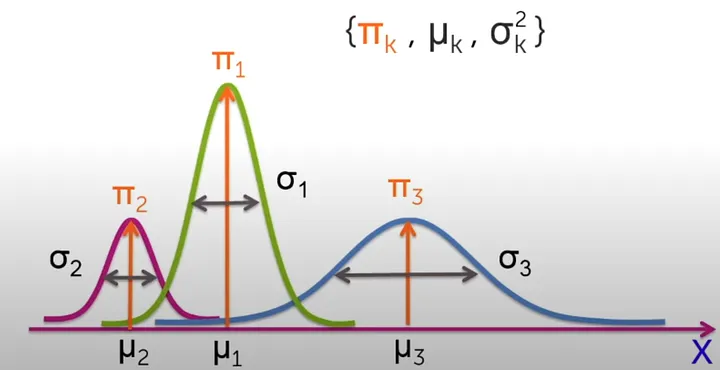

# Diferencia con K - Means

La principal diferencia entre los algoritmos de Modelos de Mezcla Gaussiana (GMM) y K-Means radica en la forma en que abordan el agrupamiento de datos y la naturaleza de los grupos que identifican:

1. **Modelo de Mezcla Gaussiana (GMM)**:

   - **Naturaleza de los grupos**: En un GMM, se asume que los datos provienen de una combinación de múltiples distribuciones Gaussianas, lo que significa que no se espera que los grupos sean necesariamente esféricos ni tengan una forma específica. Los grupos pueden superponerse y tener diferentes formas y tamaños.
   
   - **Características probabilísticas**: Los GMMs asignan probabilidades a la pertenencia de un punto de datos a cada uno de los componentes Gaussianos. Esto significa que un punto de datos puede pertenecer en cierta medida a múltiples componentes. Esto es útil para modelar la incertidumbre en la asignación de grupos.

   - **Usos comunes**: Los GMMs son especialmente útiles cuando se trabaja con datos que tienen una estructura más compleja y no se ajustan bien a grupos con formas geométricas regulares. También se utilizan para modelar la densidad de probabilidad de los datos y para problemas de generación de datos.

2. **K-Means**:

   - **Naturaleza de los grupos**: En K-Means, se espera que los grupos sean convexos, esféricos y de igual tamaño. Cada punto de datos se asigna de manera rígida a uno de los K grupos. Esto significa que K-Means es más apropiado para datos con estructuras de grupos bien definidas y de forma más simple.

   - **Características determinísticas**: K-Means asigna cada punto de datos a un único grupo, lo que significa que no se tiene en cuenta la incertidumbre en la asignación de grupos.

   - **Usos comunes**: K-Means se utiliza cuando se busca particionar los datos en grupos claramente definidos y cuando se necesita una asignación determinística de puntos de datos a clusters. Es una técnica más adecuada para tareas de agrupamiento duro.

En resumen, la principal diferencia radica en la flexibilidad y la capacidad de manejar estructuras de datos más complejas por parte de los Modelos de Mezcla Gaussiana (GMM), mientras que K-Means es más adecuado para datos que se pueden agrupar en clusters bien definidos y con formas regulares. La elección entre GMM y K-Means depende de la naturaleza de los datos y los objetivos del análisis.

## Set de datos

Para nuestros ejercicios de aprendizaje no supervisado, estaremos utilizando un set de datos de diferentes personas con 2 variables a evaluar:

- Altura (Height)
- Peso (Weight)

El objetivo es agrupar las diferentes personas en base a estas 2 variables.

## Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Obtención de datos

In [2]:
df = pd.read_csv('Clustering_gmm.csv')
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


## Visualización de Datos

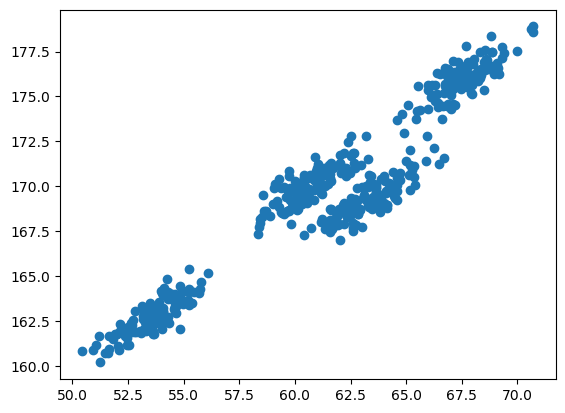

In [3]:
plt.scatter(df["Weight"],df["Height"])

## K - Means

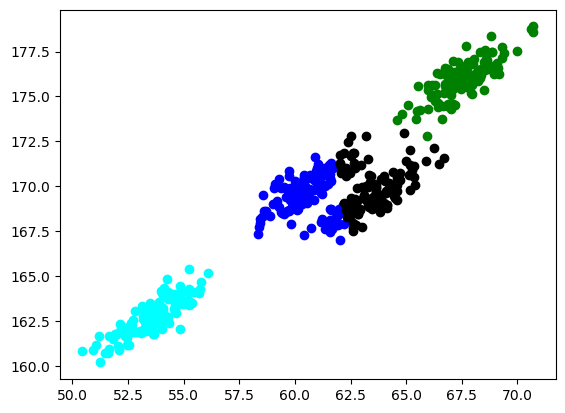

In [12]:
#Entrenando Modelo de Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df_pred = df.copy()

#Predicciones
pred = kmeans.labels_
df_pred['cluster'] = pred
df_pred.columns = ['Weight', 'Height', 'cluster']

#Graficando
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = df_pred[df_pred["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
X = df
y = kmeans.labels_
s = silhouette_score(X,y,metric = 'euclidean')
s

0.6016775536103708

## Gaussian Mixture Models

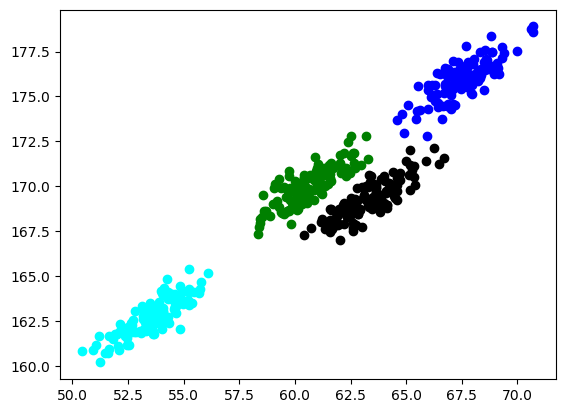

In [14]:
#Entrenando Modelo de GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df)
df_pred = df.copy()

#Predicciones
pred = gmm.predict(df)
df_pred['cluster'] = pred
df_pred.columns = ['Weight', 'Height', 'cluster']

#Graficando
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = df_pred[df_pred["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [17]:
X = df
y = pred
s = silhouette_score(X,y,metric = 'euclidean')
s

0.6009974999855167

# Fin